In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
fromage = pd.read_csv("http://www.math.u-bordeaux.fr/~mchave100p/wordpress/wp-content/uploads/2013/10/fromage.txt",sep="\t",header=0,index_col=0)

In [2]:
fromage
fromage.head(5)

calories  sodium  calcium  lipides  retinol  folates  proteines  \
Fromages                                                                       
CarredelEst       314   353.5     72.6     26.3     51.6     30.3       21.0   
Babybel           314   238.0    209.8     25.1     63.7      6.4       22.6   
Beaufort          401   112.0    259.4     33.3     54.9      1.2       26.6   
Bleu              342   336.0    211.1     28.9     37.1     27.5       20.2   
Camembert         264   314.0    215.9     19.5    103.0     36.4       23.4   

             cholesterol  magnesium  
Fromages                             
CarredelEst           70         20  
Babybel               70         27  
Beaufort             120         41  
Bleu                  90         27  
Camembert             60         20

In [3]:
# on centre et on réduit

import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fromage_cr = sc.fit_transform(fromage.values)

In [4]:
#dimension des données

print(fromage.shape)

#statistiques descriptives

print(fromage.describe())




(29, 9)
         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80

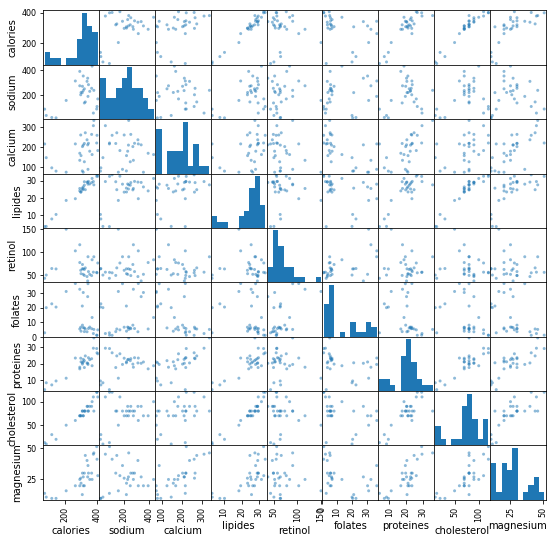

In [6]:
#graphique - croisement deux à deux des variables

scatt_mat = scatter_matrix(fromage,figsize=(9,9))[-1]

## CAH

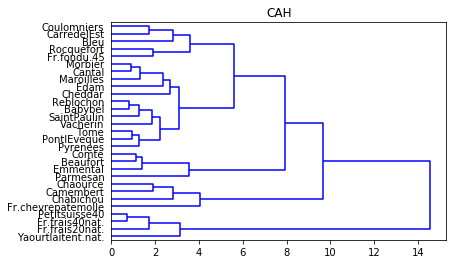

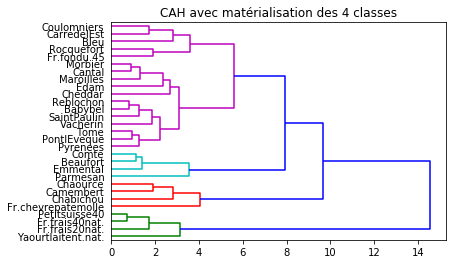

In [9]:
#matérialisation des 4 classes (hauteur t = 7)

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='right',color_threshold=7)
plt.show()



In [6]:
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus

groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)


[4 4 3 4 2 4 2 2 4 3 4 4 3 2 4 1 1 4 4 3 1 4 4 4 4 4 4 4 1]


In [7]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(fromage.index[idg],groupes_cah[idg]))


             Fromages
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
1       Petitsuisse40
1      Fr.frais40nat.
2  Fr.chevrepatemolle
2           Camembert
2           Chabichou
2            Chaource
3            Emmental
3            Parmesan
3            Beaufort
3               Comte
4            Pyrenees
4         PontlEveque
4          Rocquefort
4         SaintPaulin
4                Tome
4           Reblochon
4         CarredelEst
4           Maroilles
4            Vacherin
4                Edam
4         Coulomniers
4             Cheddar
4              Cantal
4                Bleu
4             Babybel
4             Morbier
4         Fr.fondu.45


Le 1er groupe est constitué de fromages frais.  
Le 2nd de fromages à pâte molle.  
Le 3ème de fromages durs.  
Le 4ème est un peu fourre-tout.  


## K-means

In [8]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus
kmeans.fit(fromage_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))



[3 2 0 2 3 2 3 3 0 0 3 0 0 3 2 1 1 2 2 0 1 2 2 2 2 2 2 2 1]
             Fromages
0             Cheddar
0            Parmesan
0            Beaufort
0            Emmental
0                Edam
0               Comte
1       Petitsuisse40
1      Fr.frais20nat.
1  Yaourtlaitent.nat.
1      Fr.frais40nat.
2            Pyrenees
2           Reblochon
2          Rocquefort
2         SaintPaulin
2                Tome
2             Morbier
2         PontlEveque
2         Fr.fondu.45
2            Vacherin
2              Cantal
2                Bleu
2             Babybel
2           Maroilles
3  Fr.chevrepatemolle
3         Coulomniers
3            Chaource
3           Chabichou
3           Camembert
3         CarredelEst


In [9]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(fromage_cr),index = fromage.index)
print(dist_data)

                           0         1         2         3
Fromages                                                  
CarredelEst         4.961355  5.525639  2.874758  2.223661
Babybel             2.572349  5.190152  0.722708  3.017874
Beaufort            1.009182  7.505349  2.965545  5.161412
Bleu                3.713778  6.124589  2.058771  3.236961
Camembert           4.925560  5.403772  3.509210  1.933430
Cantal              2.011396  6.296011  1.228816  4.024862
Chabichou           4.305190  5.925956  3.416718  1.778697
Chaource            4.850715  5.554870  3.458989  1.032372
Cheddar             1.909428  6.824554  2.103287  3.748034
Comte               1.359632  7.842530  3.525334  5.442474
Coulomniers         4.444960  4.842860  2.491710  1.957956
Edam                1.384483  6.125677  2.293757  4.229224
Emmental            1.118710  7.477880  3.483546  5.526302
Fr.chevrepatemolle  6.868376  5.010448  5.536151  3.097303
Fr.fondu.45         4.202041  5.282331  1.811195  2.8370

In [10]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0  0  1   2  3
row_0             
1      0  4   0  0
2      0  0   0  4
3      4  0   0  0
4      2  0  13  2

Il y bien correspondances entre les groupes proposés par la CAH et la méthode des K-means.
Les deux groupes 1 sont identiques, et il y a de fortes correspondances dans les autres.

[0.48626255 0.38724166 0.34540073 0.29684146 0.31338867 0.29734924
 0.28742486 0.29826524 0.26843224 0.19944494 0.18996426 0.1743256
 0.20772736 0.20612371 0.17270102]


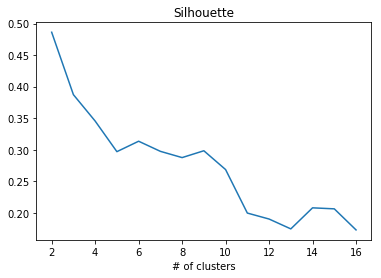

In [11]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage_cr)
    res[k] = metrics.silhouette_score(fromage_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

le nombre de groupes le plus adapté au sens de la metric "silhouette" est 2.

[20.70252871 20.63325164 21.46005127 19.6555192  17.8529625  17.46381882
 15.66024254 15.06089262 15.90500497 15.44062435 16.02169878 16.51839947
 16.43300285 16.60942687 17.94162968]


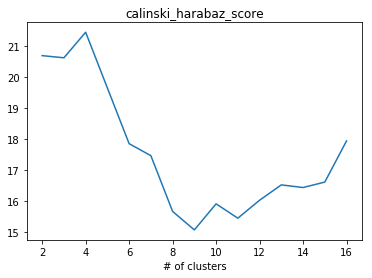

In [12]:
#utilisation de la métrique "calinski_harabaz_score"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage_cr)
    res[k] = metrics.calinski_harabaz_score(fromage_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("calinski_harabaz_score")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

le nombre de groupe le plus adapté au sens de la metric "calinski_harabaz_score" est 4.

D'autres metrics....  ('https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics')

## interprétation des classes


In [13]:
#moyenne par variable

m = fromage.mean()

#TSS

TSS = fromage.shape[0]*fromage.var(ddof=0)
print(TSS)


calories       236550.965517
sodium         330711.034483
calcium        147292.285517
lipides          1850.550345
retinol         16347.948276
folates          3848.226897
proteines        1356.282069
cholesterol     22339.034483
magnesium        3586.965517
dtype: float64


In [14]:
#data.frame conditionnellement aux groupes

gb = fromage.groupby(kmeans.labels_)

#effectifs conditionnels

nk = gb.size()
print(nk)


0     6
1     4
2    13
3     6
dtype: int64


In [15]:
#moyennes conditionnelles

mk = gb.mean()
print(mk)

#pour chaque groupe écart à la moyenne par variable

EMk = (mk-m)**2

#pondéré par les effectifs du groupe

EM = EMk.multiply(nk,axis=0)


     calories      sodium     calcium    lipides    retinol    folates  \
0  382.000000  137.333333  262.866667  29.966667  66.533333   3.416667   
1  101.750000   44.750000  133.750000   6.275000  55.150000  16.475000   
2  328.769231  274.769231  201.038462  27.115385  58.792308   7.946154   
3  288.000000  252.916667  110.100000  23.866667  95.866667  31.266667   

   proteines  cholesterol  magnesium  
0  28.600000   103.333333  42.500000  
1   7.200000    18.250000  11.250000  
2  20.861538    81.538462  27.076923  
3  18.883333    68.333333  21.666667  


In [17]:
#somme des valeurs => BSS

BSS = np.sum(EM,axis=0)
print(BSS)


calories       209179.907825
sodium         206499.435124
calcium         83873.991415
lipides          1595.859255
retinol          6429.302378
folates          2933.405422
proteines        1115.422966
cholesterol     18516.387047
magnesium        2604.459107
dtype: float64


In [18]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes pour chaque variable

R2 = BSS/TSS
print(R2)

calories       0.884291
sodium         0.624410
calcium        0.569439
lipides        0.862370
retinol        0.393279
folates        0.762275
proteines      0.822412
cholesterol    0.828880
magnesium      0.726090
dtype: float64


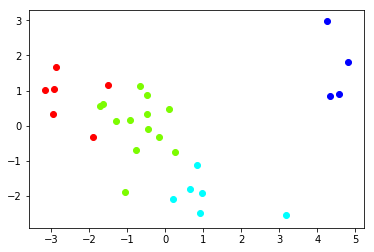

In [19]:
#ACP

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(fromage_cr)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

#### problème:
le groupe 1 ici en bleu, écrase les autres données en la tassant dans une partie du graphe.  
Il convient donc d'exclure ces données et de recommencer l'ACP dans un autre plan que ce plan factoriel.

In [20]:
#retirer des observations le groupe n°1 du k-means précédent
fromage_subset = fromage.iloc[kmeans.labels_!=1,:]

print(fromage_subset.shape)
print(fromage_subset)

(25, 9)
                    calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
CarredelEst              314   353.5     72.6     26.3     51.6     30.3   
Babybel                  314   238.0    209.8     25.1     63.7      6.4   
Beaufort                 401   112.0    259.4     33.3     54.9      1.2   
Bleu                     342   336.0    211.1     28.9     37.1     27.5   
Camembert                264   314.0    215.9     19.5    103.0     36.4   
Cantal                   367   256.0    264.0     28.8     48.8      5.7   
Chabichou                344   192.0     87.2     27.9     90.1     36.3   
Chaource                 292   276.0    132.9     25.4    116.4     32.5   
Cheddar                  406   172.0    182.3     32.5     76.4      4.9   
Comte                    399    92.0    220.5     32.4     55.9      1.3   
Coulomniers              308   222.0     79.2     25.6     63.6     21.1   
Edam

In [21]:
#centrer et réduire
fromage_subset_cr = sc.fit_transform(fromage_subset.values)
print(fromage_subset_cr)

[[-0.39381361  1.30500945 -1.72955207 -0.19779623 -0.72539249  1.49893456
  -0.26280506 -0.79176894 -0.9615099 ]
 [-0.39381361  0.0162903   0.22426132 -0.5274566  -0.23635476 -0.50871709
   0.07520788 -0.79176894 -0.25153423]
 [ 1.53534089 -1.38958513  0.93059619  1.72522264 -0.59201856 -0.94552833
   0.92024022  2.11914627  1.16841709]
 [ 0.2270637   1.10974898  0.24277413  0.51646792 -1.31142943  1.26372851
  -0.43181152  0.37259715 -0.25153423]
 [-1.50252309  0.86427866  0.31112912 -2.0658717   1.35200744  2.01134775
   0.24421435 -1.37395198 -0.9615099 ]
 [ 0.78141844  0.21712965  0.99610306  0.48899623 -0.83855824 -0.5675186
   0.15971111  0.37259715  0.05274105]
 [ 0.27141208 -0.49696581 -1.52163899  0.24175094  0.83063664  2.00294753
  -0.57969218 -0.20958589  0.66129162]
 [-0.88164578  0.44028448 -0.87084254 -0.44504151  1.8935864   1.68373932
  -0.93883093 -0.79176894 -0.45438442]
 [ 1.64621184 -0.72012064 -0.16735579  1.50544906  0.27693277 -0.63472033
   0.79348536  1.536963

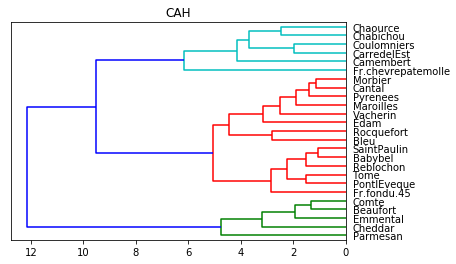

[3 2 1 2 3 2 3 3 1 1 3 2 1 3 2 2 2 1 2 2 2 2 2 2 2]


In [22]:
#générer la matrice des liens

Z_subset = linkage(fromage_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme

plt.title("CAH")
dendrogram(Z_subset,labels=fromage_subset.index,orientation='left',color_threshold=7)
plt.show()

#groupes

groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)

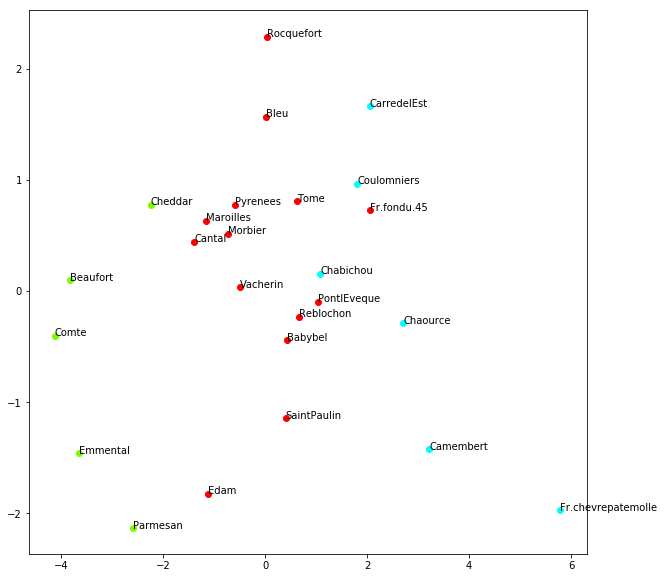

In [23]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(fromage_subset_cr)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(10,10))
for couleur,k in zip(['lawngreen','red','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
#mettre les labels des points
#remarquer le rôle de enumerate()
for i,label in enumerate(fromage_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()

Quelques fromages ont changé de camp...

## Exercice:

Sur le jeu de données suivant: 
    * extraire les données sur les dimensions des pétales
    * effectuer une CAH
    * utilisiser la méthode K-Means
    * Comparer les méthode
    * peut-on dire que la classification est bonne comparée au numéro de l'espèce donné?
    * effectuer une ACP
    * doit-on recommencer en excluant un groupe?


In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [30]:
df = pd.read_excel('../data/Iris.xls')   # attention au chemin!!!!!
df.head(4)

Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0           1          0.2           1.4          3.5           5.1   
1           1          0.2           1.4          3.0           4.9   
2           1          0.2           1.3          3.2           4.7   
3           1          0.2           1.5          3.1           4.6   

  Species_name  
0       Setosa  
1       Setosa  
2       Setosa  
3       Setosa

In [31]:
df = df.drop('Species_name', axis=1)
df = df.drop('Species_No', axis=1)
df.head(2)

Petal_width  Petal_length  Sepal_width  Sepal_length
0          0.2           1.4          3.5           5.1
1          0.2           1.4          3.0           4.9

In [32]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfcr = sc.fit_transform(df.values)

In [33]:
print(df.shape)
print(df.describe())

(150, 4)
       Petal_width  Petal_length  Sepal_width  Sepal_length
count   150.000000    150.000000   150.000000    150.000000
mean      1.199333      3.758000     3.057333      5.843333
std       0.762238      1.765298     0.435866      0.828066
min       0.100000      1.000000     2.000000      4.300000
25%       0.300000      1.600000     2.800000      5.100000
50%       1.300000      4.350000     3.000000      5.800000
75%       1.800000      5.100000     3.300000      6.400000
max       2.500000      6.900000     4.400000      7.900000


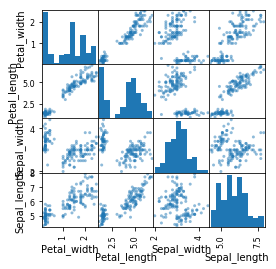

In [7]:
scatt_mat = scatter_matrix(df,figsize=(4,4))[-1]

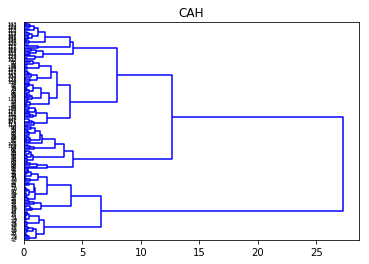

In [34]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(dfcr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=df.index,orientation='right',color_threshold=0)
plt.show()

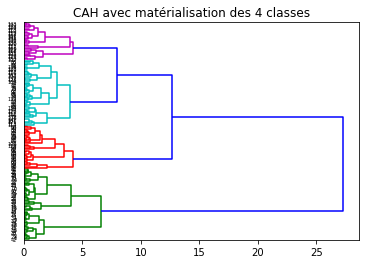

In [35]:
#matérialisation des 4 classes (hauteur t = 7)

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=df.index,orientation='right',color_threshold=7)
plt.show()

In [36]:
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus

groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 4 3 4 3 3 4 2 4 3 4 4
 3 4 3 3 4 3 4 4 2 4 3 4 3 4 4 3 3 3 4 4 4 3 3 3 4 4 3 3 4 4 4 3 4 4 4 3 3
 4 3]


In [40]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(df.index[idg],groupes_cah[idg]))


      0
1     0
1    27
1    28
1    29
1    30
1    31
1    32
1    33
1    34
1    35
1    36
1    37
1    38
1    39
1    40
1    42
1    43
1    44
1    45
1    46
1    47
1    48
1    26
1    25
1    49
1    23
1    24
1     1
1     2
1     3
..  ...
3    77
3    86
3    91
3    76
4   144
4   145
4   143
4   136
4   141
4   140
4   139
4   105
4   102
4   135
4   117
4   115
4   109
4   131
4   130
4   129
4   110
4   112
4   100
4   124
4   122
4   120
4   148
4   118
4   107
4   125

[150 rows x 1 columns]


In [41]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus
kmeans.fit(dfcr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(df.index[idk],kmeans.labels_[idk]))

[1 3 3 3 1 1 3 1 3 3 1 3 3 3 1 1 1 1 1 1 1 1 1 3 3 3 1 1 1 3 3 1 1 1 3 3 1
 1 3 1 1 3 3 1 1 3 1 3 1 3 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
      0
0    70
0   111
0   112
0    65
0   135
0   115
0   116
0   117
0   118
0   120
0   136
0   132
0    56
0   131
0   124
0   125
0   130
0   129
0    52
0    51
0   128
0   122
0   137
0   127
0   110
0   147
0   100
0   145
0    86
0    85
..  ...
2   149
2    82
2    81
2    80
2    79
2    78
2    83
2    73
3    12
3    11
3     9
3     6
3    13
3     3
3     2
3     1
3     8
3    23
3    29
3    25
3    30
3    34
3    35
3    38
3    42
3    45
3    47
3    49
3    24
3    41

[150 rows x 1 columns]


In [42]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(dfcr),index = df.index)
print(dist_data)

            0         1         2         3
0    3.989406  0.450081  3.121198  1.007325
1    4.017933  1.614228  2.675508  0.328413
2    4.193437  1.279470  2.974167  0.228129
3    4.197847  1.535049  2.880144  0.159697
4    4.111572  0.343070  3.300226  1.177803
5    3.898931  0.591418  3.505544  2.015019
6    4.216380  0.993957  3.148564  0.697009
7    3.973134  0.703268  2.991848  0.747619
8    4.407572  2.054769  2.925159  0.624428
9    4.057643  1.407135  2.793990  0.259954
10   3.920881  0.237567  3.321253  1.586193
11   4.078536  0.830839  3.049363  0.681361
12   4.164404  1.660700  2.806350  0.306384
13   4.630697  1.947446  3.212210  0.626116
14   4.146193  1.032551  3.888350  2.432124
15   4.495475  1.765798  4.499830  3.206385
16   4.029661  0.585930  3.609780  2.011518
17   3.913885  0.441754  3.055942  1.013561
18   3.725620  0.653573  3.344940  1.988105
19   4.101019  0.320454  3.500654  1.657523
20   3.663837  0.693812  2.808257  1.064959
21   3.944967  0.232847  3.27800

In [43]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)



col_0   0   1   2   3
row_0                
1       0  28   0  21
2       0   0  29   1
3      21   0  24   0
4      26   0   0   0

[0.58175005 0.45937792 0.3882201  0.3423634  0.32567731 0.32413601
 0.33449004 0.35435822 0.35091492 0.3479293  0.35307839 0.35659303
 0.33746161 0.31143328 0.34685818]


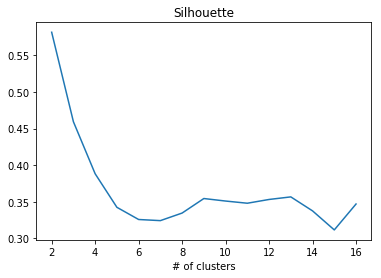

In [44]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(dfcr)
    res[k] = metrics.silhouette_score(dfcr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

[251.34933946 241.9044017  207.26591432 203.26741933 187.14011029
 178.24748439 173.77947841 177.48560227 180.25042178 177.67956654
 176.91159581 174.10494209 170.9159273  167.92737389 160.18375949]


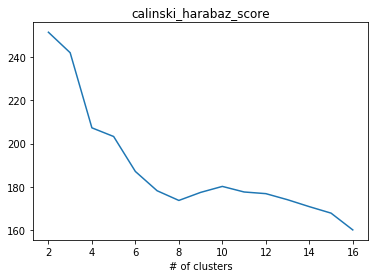

In [45]:
#utilisation de la métrique "calinski_harabaz_score"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(dfcr)
    res[k] = metrics.calinski_harabaz_score(dfcr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("calinski_harabaz_score")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

In [46]:
#moyenne par variable

m = df.mean()

#TSS

TSS = df.shape[0]*df.var(ddof=0)
print(TSS)


Petal_width      86.569933
Petal_length    464.325400
Sepal_width      28.306933
Sepal_length    102.168333
dtype: float64


In [47]:
#data.frame conditionnellement aux groupes

gb = df.groupby(kmeans.labels_)

#effectifs conditionnels

nk = gb.size()
print(nk)

0    47
1    28
2    53
3    22
dtype: int64


In [48]:
#moyennes conditionnelles

mk = gb.mean()
print(mk)

#pour chaque groupe écart à la moyenne par variable

EMk = (mk-m)**2

#pondéré par les effectifs du groupe

EM = EMk.multiply(nk,axis=0)


   Petal_width  Petal_length  Sepal_width  Sepal_length
0     1.972340      5.510638     3.095745      6.780851
1     0.271429      1.475000     3.678571      5.225000
2     1.413208      4.369811     2.673585      5.801887
3     0.213636      1.445455     3.109091      4.727273


In [49]:
#somme des valeurs => BSS

BSS = np.sum(EM,axis=0)
print(BSS)


Petal_width      75.992084
Petal_length    427.801976
Sepal_width      18.739441
Sepal_length     79.509620
dtype: float64


In [50]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes pour chaque variable

R2 = BSS/TSS
print(R2)

Petal_width     0.877812
Petal_length    0.921341
Sepal_width     0.662009
Sepal_length    0.778222
dtype: float64
